<a href="https://colab.research.google.com/github/williamvnobrega/challenge-telecomx-analise/blob/main/challenge_telecomX(ETL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [106]:
dados = pd.read_json(url)

#🔧 Transformação

In [ ]:
dados.head()

In [107]:
# Desaninha a coluna customer e concatena a coluna customer

df_customer = pd.json_normalize(dados['customer'])
dados = pd.concat([dados.drop('customer',axis=1),df_customer],axis=1)

In [108]:
# Desaninha a coluna customer e concatena a coluna phone
df_phone = pd.json_normalize(dados['phone'])
dados = pd.concat([dados.drop('phone',axis=1),df_phone],axis=1)

In [109]:
# Desaninha a coluna customer e concatena a coluna internet
df_internet = pd.json_normalize(dados['internet'])
dados = pd.concat([dados.drop('internet',axis=1),df_internet],axis=1)

In [110]:
# Desaninha a coluna customer e concatena a coluna account
df_account = pd.json_normalize(dados['account'])
dados = pd.concat([dados.drop('account',axis=1),df_account],axis=1)

In [ ]:
dados.info()

In [111]:
# Converte a coluna Charges.Total para float
dados['Charges.Total'] = dados['Charges.Total'].replace(' ', np.nan)
dados['Charges.Total'] = dados['Charges.Total'].astype(np.float64)

In [112]:
# Padronizando as colunas de texto
dados['gender'] = dados['gender'].str.lower()
dados['InternetService'] = dados['InternetService'].str.lower()
dados['Contract'] = dados['Contract'].str.lower()
dados['PaymentMethod'] = dados['PaymentMethod'].str.lower()

In [113]:
# Cria a coluna Contas_Diarias
dados['Contas_Diarias'] = (dados['Charges.Monthly']/30).round(1)

In [114]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [115]:
#Tratando as Inconsistências
dados['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [116]:
dados['Churn'] = dados['Churn'].replace('', 'No')

In [117]:
dados['MultipleLines'] = dados['MultipleLines'].replace('No phone service', 'No')

In [118]:
# Padronizando Colunas que possuem valores 'No internet service'

cols_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_internet:
    dados[col] = dados[col].replace('No internet service', 'No')

In [119]:
#Transforma Yes/No das colunas de internet para valores binários

for col in cols_internet:
    dados[col] = dados[col].map({'Yes': 1, 'No': 0})

In [120]:
#Transforma Yes/No das colunas das demais colunas para valores binários

cols_binarias = ['Churn','Partner','Dependents','PhoneService','MultipleLines','PaperlessBilling']

for col in cols_binarias:
  dados[col] = dados[col].map({'Yes':1,'No':0})

In [121]:
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.2
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,2.0
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.5
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.3
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.8


#📊 Carga e análise

In [122]:
dados.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.158745
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.002283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.200000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.300000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,3.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,4.000000


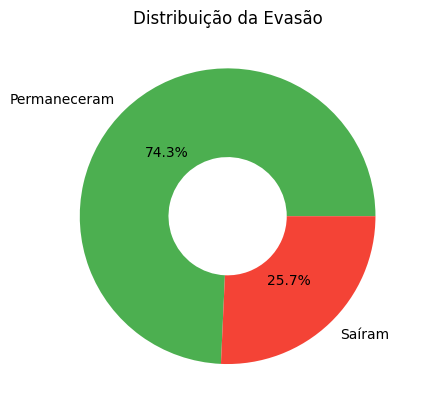

In [123]:
plt.pie(dados['Churn'].value_counts(),labels=['Permaneceram', 'Saíram'], autopct='%1.1f%%', colors=['#4CAF50', '#F44336'], wedgeprops={'width': 0.6})
plt.title('Distribuição da Evasão')
plt.show()

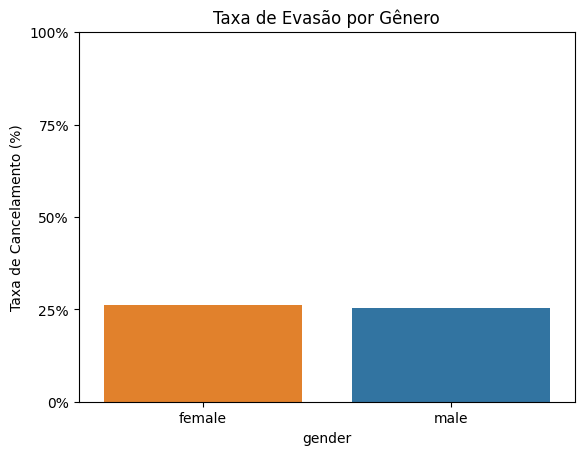

In [125]:
# Contagem de evasão por gênero

evasao_por_genero = (dados.groupby('gender')['Churn'].mean()*100).reset_index()
sns.barplot(data=evasao_por_genero,x='gender',y='Churn',hue='gender',palette=['#ff7f0e','#1f77b4'])
plt.title('Taxa de Evasão por Gênero')
plt.ylabel('Taxa de Cancelamento (%)')
plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'])
plt.show()

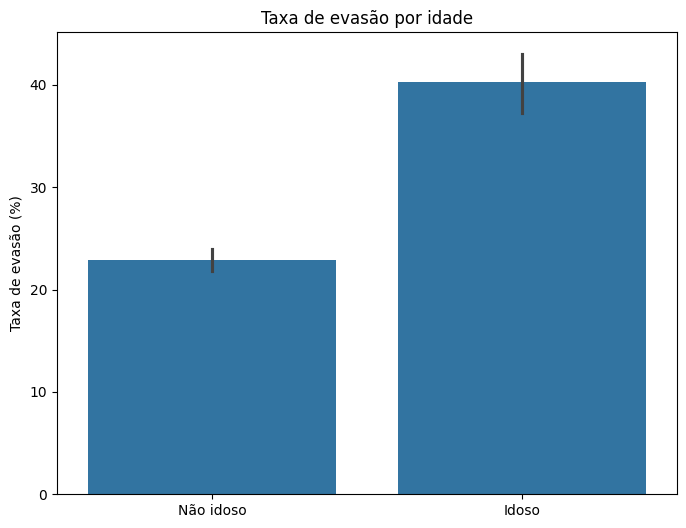

In [126]:
# Contagem de evasão por cliente senior (idade igual ou maior que 65)

plt.figure(figsize=(8,6))
sns.barplot(data=dados,x='SeniorCitizen', y='Churn',estimator=lambda x: np.mean(x) * 100)
plt.title('Taxa de evasão por idade')
plt.xticks([0,1],['Não idoso','Idoso'])
plt.ylabel('Taxa de evasão (%)')
plt.xlabel('')
plt.show()

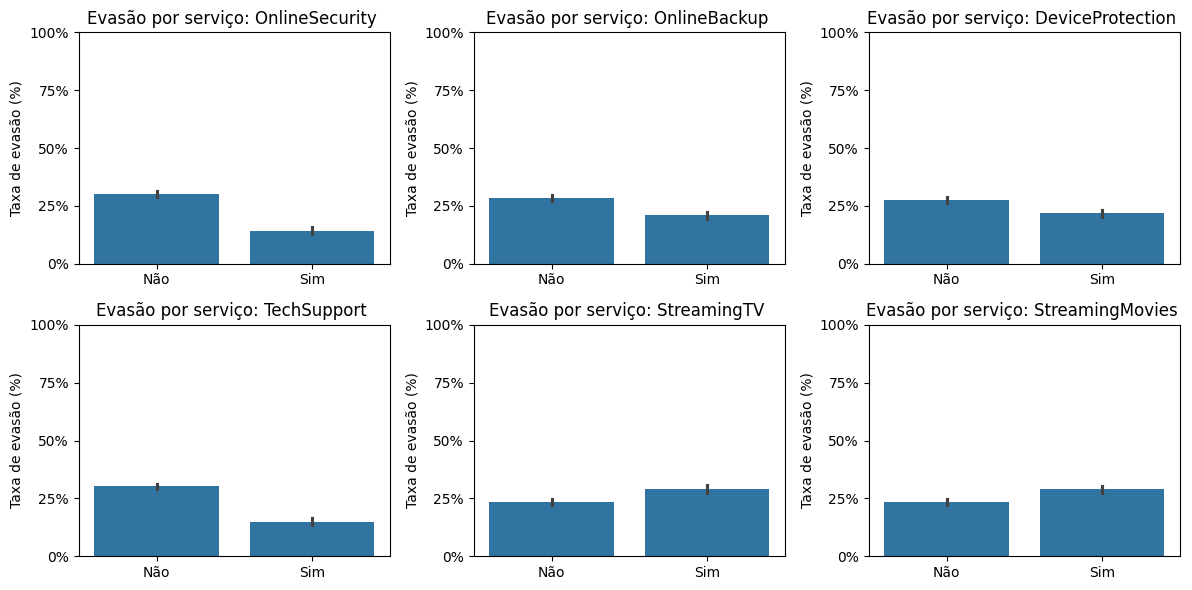

In [127]:
# Contagem de evasão por serviços adicionais

servicos = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
plt.figure(figsize=(12,6))

for i, service in enumerate(servicos, 1):
    plt.subplot(2, 3, i)
    sns.barplot(data=dados, x=service, y='Churn', estimator=lambda x: np.mean(x) * 100)
    plt.title(f'Evasão por serviço: {service} ')
    plt.ylabel('Taxa de evasão (%)')
    plt.xticks([0, 1], ['Não', 'Sim'])
    plt.xlabel('')
    plt.ylim(0, 100)
    plt.yticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'])
plt.tight_layout()
plt.show()

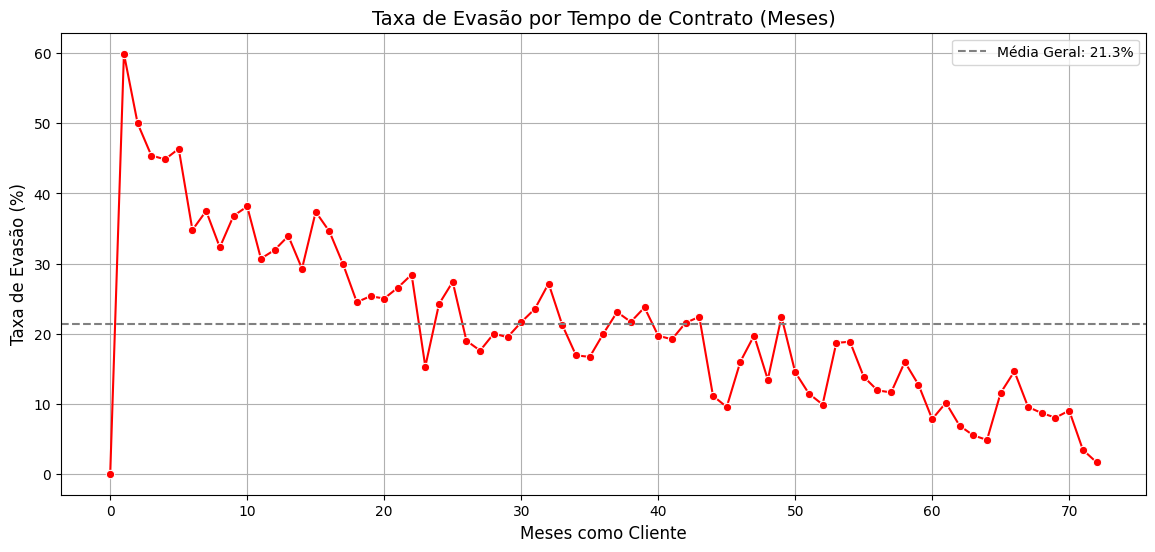

In [128]:
# Contagem de evasão por tempo de contrato
evasao_por_tempo = dados.groupby('tenure')['Churn'].mean() * 100
evasao_df = evasao_por_tempo.reset_index()
evasao_df.columns = ['Meses_Contrato', 'Taxa_Evasao_%']

plt.figure(figsize=(14, 6))
sns.lineplot(data=evasao_df, x='Meses_Contrato', y='Taxa_Evasao_%', color='red', marker='o')
plt.title('Taxa de Evasão por Tempo de Contrato (Meses)', fontsize=14)
plt.xlabel('Meses como Cliente', fontsize=12)
plt.ylabel('Taxa de Evasão (%)', fontsize=12)
plt.axhline(y=evasao_df['Taxa_Evasao_%'].mean(), color='gray', linestyle='--', label=f'Média Geral: {evasao_df["Taxa_Evasao_%"].mean():.1f}%')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-129-3497948061>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


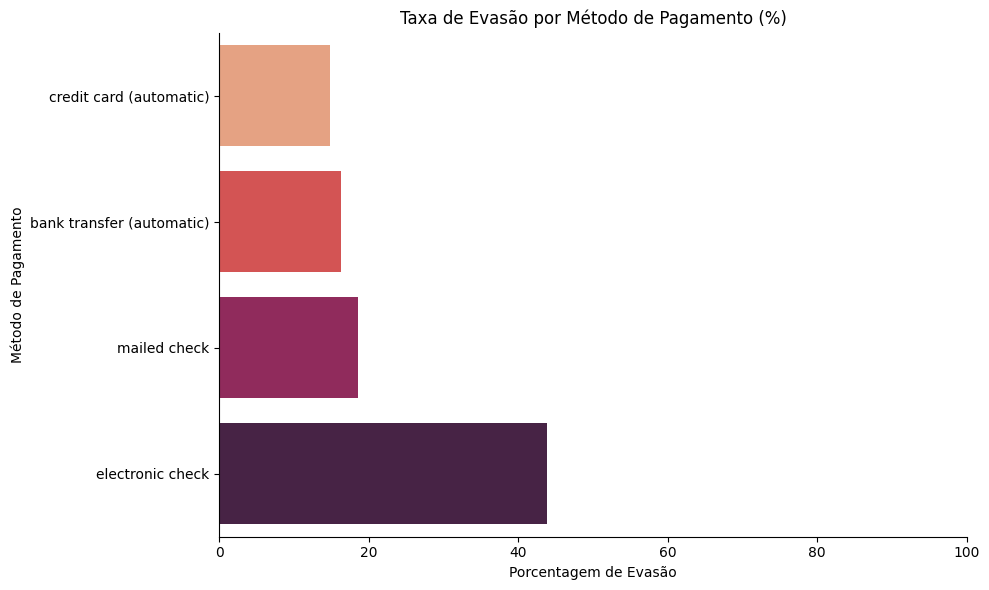

In [129]:
# Contagem de evasão por metodos de pagamento
evasao_por_metodo = dados.groupby('PaymentMethod')['Churn'].mean() * 100
evasao_por_metodo = evasao_por_metodo.sort_values()


plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=evasao_por_metodo.values,
    y=evasao_por_metodo.index,
    palette='rocket_r',
    orient='h'
)

plt.title('Taxa de Evasão por Método de Pagamento (%)')
plt.xlabel('Porcentagem de Evasão')
plt.ylabel('Método de Pagamento')
plt.xlim(0, 100)
sns.despine()
plt.tight_layout()
plt.show()

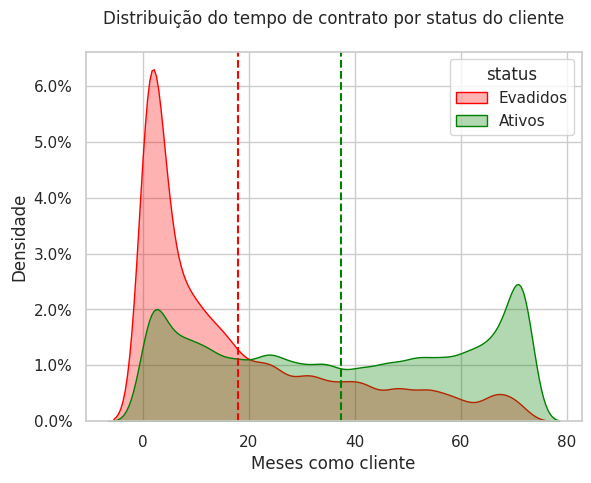

In [ ]:
# Contagem de clientes que cancelaram (evasão) e os que não cancelaram por tempo de contatro.

plt.figure()
ax = sns.kdeplot(data=dados,x='tenure',hue='Churn',
            palette={0:'green',1:'red'},
            fill=True,
            alpha=0.3,
            common_norm=False,
            bw_adjust=0.5)
media_ativos = dados[dados['Churn']==0]['tenure'].mean()
media_evadidos = dados[dados['Churn']==1]['tenure'].mean()
plt.axvline(media_ativos, color='green',linestyle='--',label=f'Média Ativos:{media_ativos:.1f} meses')
plt.axvline(media_evadidos, color='red',linestyle='--',label=f'Média Evadidos:{media_evadidos:.1f} meses')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.1f}%'))
plt.title('Distribuição do tempo de contrato por status do cliente',pad=20)
plt.xlabel('Meses como cliente',fontsize=12)
plt.ylabel('Densidade',fontsize=12)
plt.legend(title='status', labels=['Evadidos','Ativos'])
plt.grid(True)
plt.show()



<ipython-input-131-2141731948>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


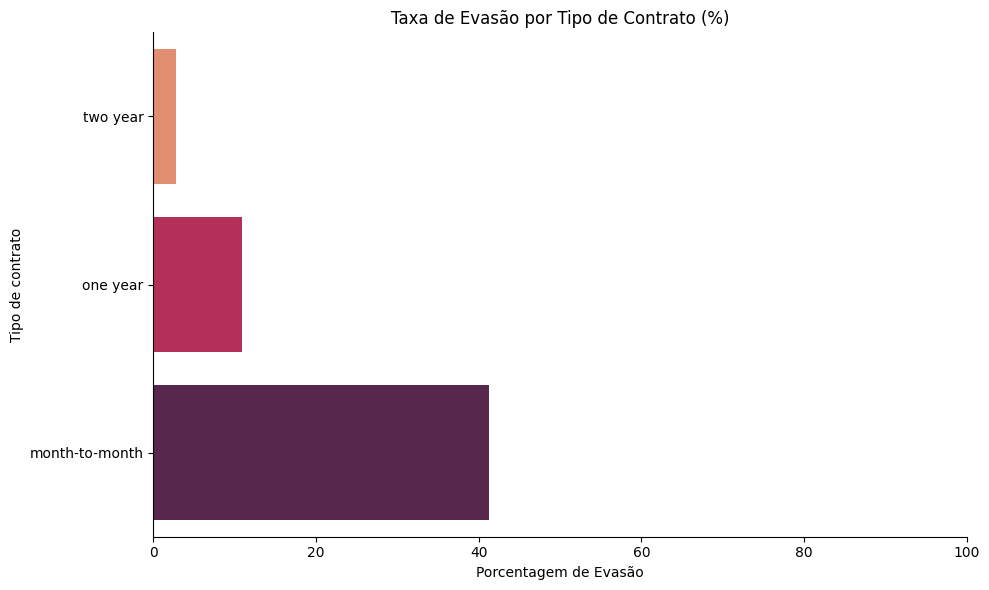

In [131]:
# Contagem de clientes por tipo de contrato

evasao_por_contrato = dados.groupby('Contract')['Churn'].mean() * 100
evasao_por_contrato = evasao_por_contrato.sort_values()

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=evasao_por_contrato.values,
    y=evasao_por_contrato.index,
    palette='rocket_r',
    orient='h'
)
plt.title('Taxa de Evasão por Tipo de Contrato (%)')
plt.xlabel('Porcentagem de Evasão')
plt.ylabel('Tipo de contrato')
plt.xlim(0, 100)
sns.despine()
plt.tight_layout()
plt.show()

In [166]:
evasao_por_contrato = dados.groupby('Contract')['Churn'].mean() * 100
evasao_por_contrato = evasao_por_contrato.sort_values()
print(evasao_por_contrato)

Contract
two year           2.753873
one year          10.928242
month-to-month    41.323346
Name: Churn, dtype: float64


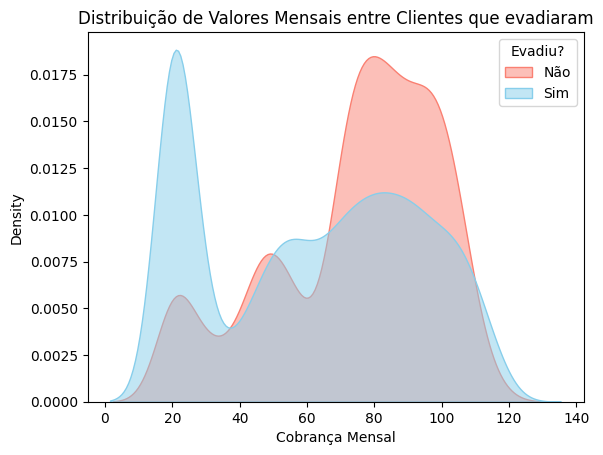

In [154]:
# Contagem de clientes por cobrança mensal

sns.kdeplot(data=dados, x='Charges.Monthly', hue='Churn',
            fill=True, palette=['skyblue','salmon'],
            alpha=0.5, common_norm=False)
plt.title('Distribuição de Valores Mensais entre Clientes que evadiaram')
plt.xlabel('Cobrança Mensal')
plt.legend(title='Evadiu?', labels=['Não', 'Sim'])
plt.show()

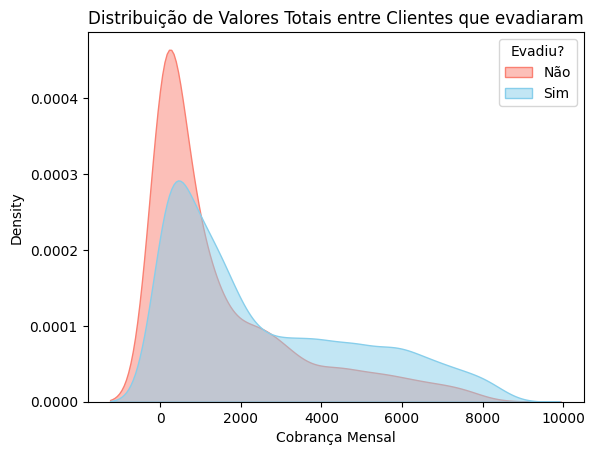

In [155]:
# Contagem de clientes por cobrança total
sns.kdeplot(data=dados, x='Charges.Total', hue='Churn',
            fill=True, palette=['skyblue','salmon'],
            alpha=0.5, common_norm=False)
plt.title('Distribuição de Valores Totais entre Clientes que evadiaram')
plt.xlabel('Cobrança Mensal')
plt.legend(title='Evadiu?', labels=['Não', 'Sim'])
plt.show()

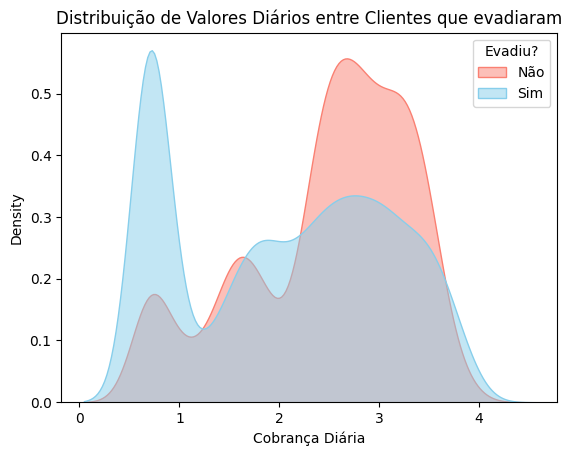

In [167]:
# Contagem de clientes por cobrança total
sns.kdeplot(data=dados, x='Contas_Diarias', hue='Churn',
            fill=True, palette=['skyblue','salmon'],
            alpha=0.5, common_norm=False)
plt.title('Distribuição de Valores Diários entre Clientes que evadiaram')
plt.xlabel('Cobrança Diária')
plt.legend(title='Evadiu?', labels=['Não', 'Sim'])
plt.show()

#📄Relatorio Final

O objetivo da análise é entender os fatores que levam os clientes da Telecom X a cancelar suas assinaturas. Para importação dos dados, foi criada uma variável com endereço dos dados disponibilizados no formato JSON (*raw*). A partir disso, utilizando a biblioteca Pandas, foi criado um data frame. Em seguida, foi realizado o desaninhamento das colunas *customer, phone, internet e account*, concatenando-as com data frame original. Em seguida, após verificar os tipos de dados no data frame, foi  realizada a formatação da coluna Charge.Total para o tipo *float* (utilizando a biblioteca NumPy), por se tratar de uma coluna numérica. Logo depois, foram tratados os valores das colunas de texto, padronizando-os para iniciar com letra minúscula.
Após a verificação dos valores de cada coluna, foram identificados dados inconsistentes com a saída esperada. Por exemplo: coluna Churn, onde esperava-se Sim (*Yes*) ou Não (*No*), foram encontrados valores em branco (“ ”), que foram devidamente tratados. Já nas colunas de serviço de internet, foi feita a padronização das saídas. O valor “*No internet service*” foi alterado para “No”, uma vez que clientes sem assinatura de internet não teriam como haver cobranças adicionais relacionadas a esse serviço. Por fim, realizou-se a conversão dos valores *Yes/No* para binários (0 e 1), facilitando o processamento matemático.

Os principais insights da análise são os clientes com contratos mais curtos têm maior taxa de evasão (51.4%), enquanto contratos longos (acima de 60 meses) têm a menor evasão (6.4%). Os clientes que evadiram tendem a ter cobranças mensais mais altas em comparação com os clientes ativos. Já em relação com serviços adicionais de internet como *online security, tech support, online backup, e device protection* estão associados a taxas de evasão significativamente menores de 14% a 21% em comparação com clientes sem esses serviços. Em relação a métodos de pagamentos cliente que usam *electronic check* têm a maior taxa de evasão (43.8%), enquanto pagamentos automáticos (cartão de crédito ou transferência bancária) têm taxas menores. Foi analisado também que clientes com perfil sênior têm uma taxa de evasão mais alta (40.3%) em comparação com não idosos. Por fim, clientes com contratos mensais (*month-to-month*) têm maior taxa de evasão 41.3%, enquanto contratos anuais e bienais são mais estáveis com taxas de 10.9% e 2.7% respectivamente.
Com base na análise pode-se sugerir a oferta de planos para clientes com maior tempo de fidelidades com planos mais acessíveis ou descontos progressivos, promover pacotes que incluam serviços adicionais ao plano de internet. Além disso, ações direcionadas a grupos de alto risco como idosos, para assim melhorar a retenção de clientes.
